# Movies Tweets

## Table of content:
* [Load and handle our data](#data-loading)
    * [MovieTweetings data set](#mtd)
    * [Internet Movie Database (IMDb)](#imdb)
* [Exploratory data analysis](#eda)
* [Interesting Insight 1: Synergy of Genres](#ii1)
* [Interesting Insight 2: Best Actors in The Genre](#ii2)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

## Load and handle our data <a name="data-loading"></a>

### MovieTweetings data set <a name="mtd"></a>

In [ ]:
DATADIR = "./data/"

In [8]:
def prepare_MovieTweetings(DATADIR="./data/"):
    cols = ['user id', 'item id', 'rating', 'timestamp']
    ratings = pd.read_csv(DATADIR+'ratings.dat', sep='::', index_col=False, names=cols, encoding="UTF-8", engine='python')
    # Convert time
    ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
    ratings["year"] = ratings["timestamp"].apply(lambda x: x.year)
    cols = ['movie id','movie title','genre']
    movies = pd.read_csv(DATADIR + 'movies.dat', sep='::', index_col=False, names=cols,encoding="UTF-8", engine='python')
    ratings = ratings.merge(right=movies, left_on="item id", right_on="movie id")
    ratings.drop("item id",axis=1,inplace=True)
    return ratings

In [15]:
MovieTweetingsData = prepare_MovieTweetings(DATADIR)

### Internet Movie Database <a name="imdb"></a>

In [9]:
imdb_actors = pd.read_table(DATADIR+"name.basics.tsv.gz")
imdb_actors.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0043044,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0057345,tt0054452,tt0049189,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0083922,tt0050976,tt0050986"


In [10]:
imdb_films = pd.read_table(DATADIR+"title.basics.tsv.gz", compression='gzip', low_memory=False)
imdb_films = imdb_films.merge(right=pd.read_table(DATADIR+"title.ratings.tsv.gz", compression='gzip'), left_on="tconst", right_on="tconst")
imdb_films.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1405
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,993
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1697


In [11]:
def get_unique_genre(multiple_genres, split_symbol="|"):
    """
    Take an array of multiple_genres in format 
    array(['Documentary|Short', nan, 'Short|Horror', ..., 'Comedy|Music|News',
       'Adventure|Sport', 'Documentary|Reality-TV'], dtype=object)
    and return a set of unique genres
    """
    unique_genres = set()
    for genres in multiple_genres:
        for genre in genres.split(split_symbol):
            unique_genres.add(genre)
    return unique_genres

In [12]:
imdb_films["genres"].unique()

array(['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance',
       ..., 'Crime,Drama,Game-Show', 'Biography,Fantasy,Sci-Fi',
       'Animation,Fantasy,Western'], dtype=object)

In [13]:
get_unique_genre(imdb_films["genres"].unique(), split_symbol=",")

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western',
 '\\N'}

## Exploratory data analysis <a name="eda"></a>

In [17]:
MovieTweetingsData.head()

,user id,rating,timestamp,year,movie id,movie title,genre
0,1,10,2013-10-12 23:20:27,2013,68646,The Godfather (1972),Crime|Drama
1,17,10,2017-02-07 09:20:36,2017,68646,The Godfather (1972),Crime|Drama
2,43,9,2013-10-22 16:41:33,2013,68646,The Godfather (1972),Crime|Drama
3,48,9,2013-04-01 16:48:30,2013,68646,The Godfather (1972),Crime|Drama
4,51,8,2013-03-04 23:40:16,2013,68646,The Godfather (1972),Crime|Drama


In [19]:
MovieTweetingsData['rating'].describe()

count    727563.000000
mean          7.301794
std           1.857884
min           0.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          10.000000
Name: rating, dtype: float64

In [20]:
print (MovieTweetingsData['rating'].dtype)
print (MovieTweetingsData['timestamp'].dtype)
print (MovieTweetingsData.shape)

int64
datetime64[ns]
(727563, 7)


In [33]:
rating_counts = MovieTweetingsData["rating"].value_counts() #Count for different rating values

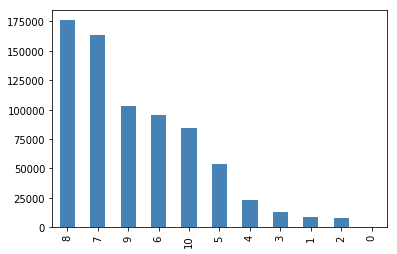

In [34]:
#To see what happens if you do not sort the ratings first, plot the rating_counts object, 
#that is, run rating_counts.plot(kind='bar', color='SteelBlue') in a cell.
rating_counts.plot(kind='bar', color='SteelBlue')

In [35]:
sorted_counts = rating_counts.sort_index()
#sorted_counts

Text(0,0.5,'Count')

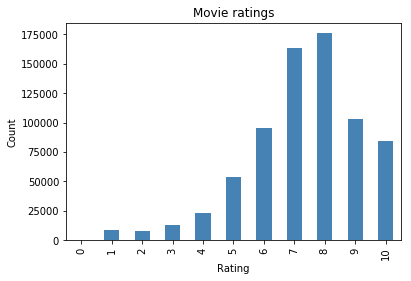

In [36]:
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('latex/figs/plot.png')

In [37]:
drama = MovieTweetingsData[MovieTweetingsData['genre']=='Crime|Drama']

In [45]:
drama[:4]

,user id,rating,timestamp,year,movie id,movie title,genre
0,1,10,2013-10-12 23:20:27,2013,68646,The Godfather (1972),Crime|Drama
1,17,10,2017-02-07 09:20:36,2017,68646,The Godfather (1972),Crime|Drama
2,43,9,2013-10-22 16:41:33,2013,68646,The Godfather (1972),Crime|Drama
3,48,9,2013-04-01 16:48:30,2013,68646,The Godfather (1972),Crime|Drama


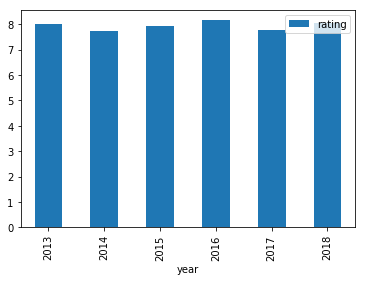

In [224]:
drama[["rating","year"]].groupby("year").mean().plot(kind="bar")
# 2016 is the best year for the Crime + Drama genre, while 2014 is the worst year for that genre

Text(0,0.5,'Count')

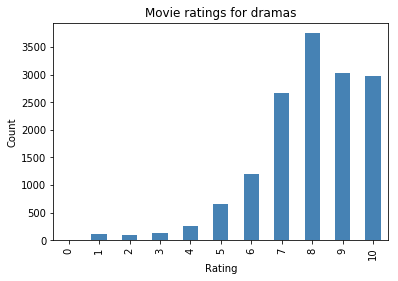

In [225]:
rating_counts = drama['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings for dramas')
plt.xlabel('Rating')
plt.ylabel('Count')

In [53]:
get_unique_genre(MovieTweetingsData.genre.dropna().unique())

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [57]:
def get_ratings_for_individual_genres(MovieTweetingsData):
    ratings = []
    years = []
    movie_titles = []
    genres = []
    for _, line in MovieTweetingsData.dropna().iterrows():
        for genre in line["genre"].split("|"):
            ratings.append(line["rating"])
            years.append(line["year"])
            movie_titles.append(line["movie title"])
            genres.append(genre)
    return pd.DataFrame({"rating":ratings,
                        "year":years,
                        "movie title":movie_titles,
                        "genre":genres})

In [58]:
df_ratings = get_ratings_for_individual_genres(MovieTweetingsData) #Not memory efficient, however works quite fast

In [167]:
df_ratings[["rating", "genre"]].groupby(["genre"]).mean()

,rating
genre,
Action,7.125502
Adult,7.000000
Adventure,7.394190
Animation,7.644407
Biography,7.818320
Comedy,7.097676
Crime,7.301165
Documentary,7.861124
Drama,7.533263


In [226]:
# df_ratings[["rating", "genre"]].plot(x=1, y=0, kind = "box", figsize =(15,15))

In [220]:
genres = df_ratings.genre[(df_ratings.year>2015)].value_counts()
genres
genres = genres.index[genres>1000].tolist()

In [221]:
genres

['Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Thriller',
 'Crime',
 'Sci-Fi',
 'Biography',
 'Fantasy',
 'Mystery',
 'Romance',
 'Horror',
 'Animation',
 'History',
 'Family',
 'War',
 'Music',
 'Documentary',
 'Musical',
 'Sport',
 'Western']

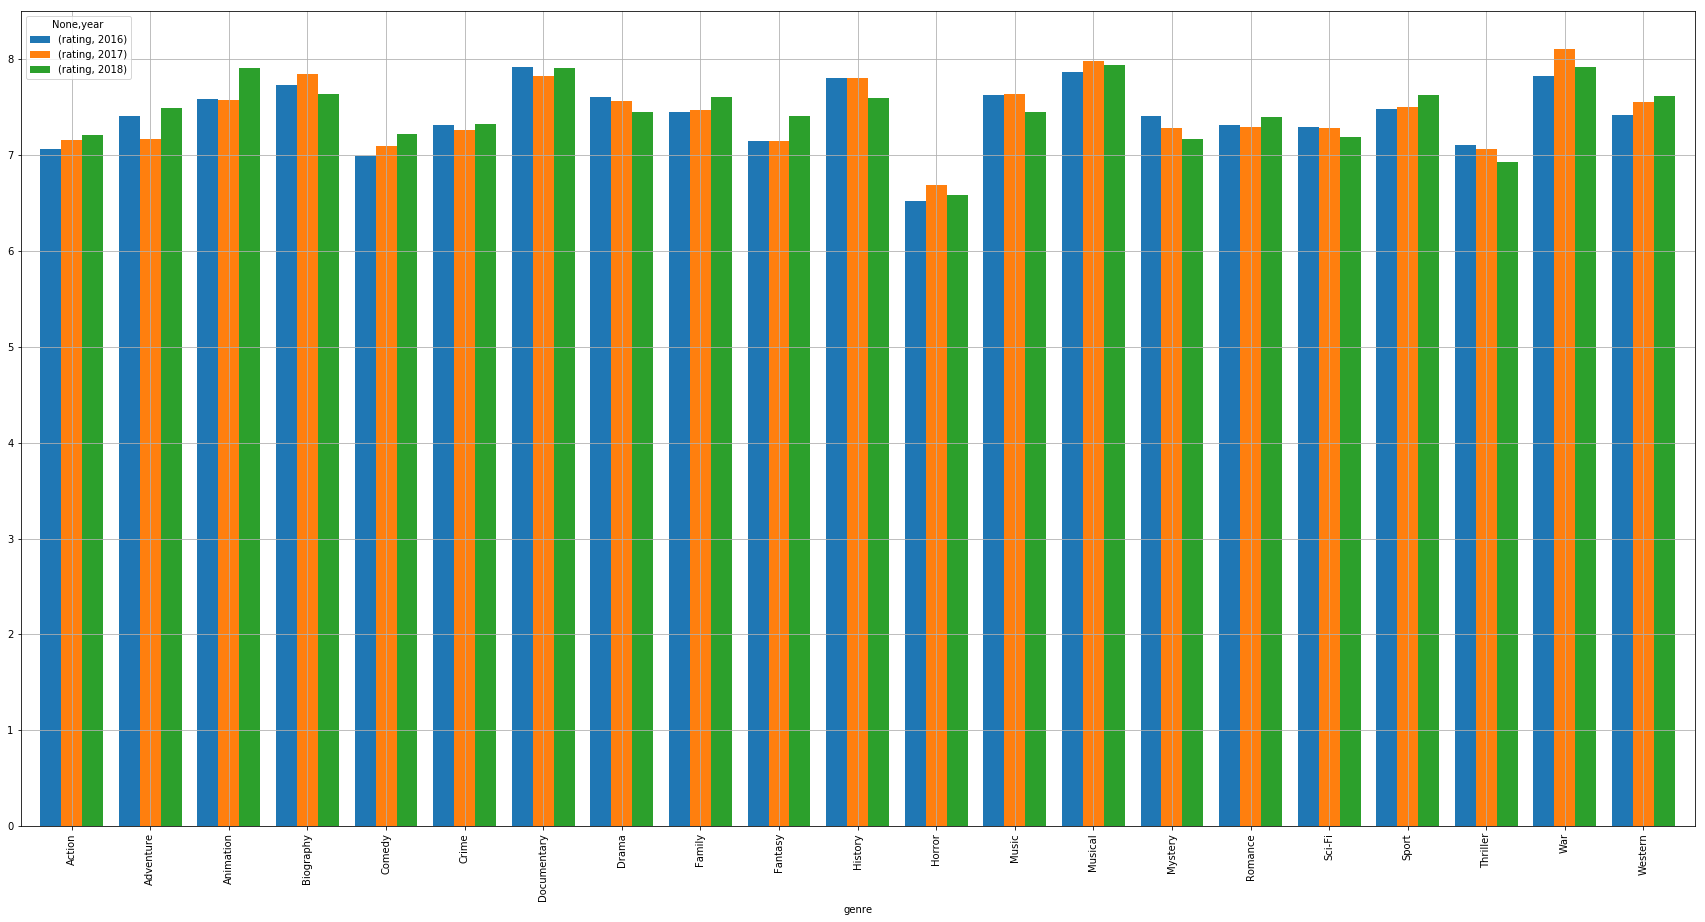

In [222]:
# http://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html
df_ratings[(df_ratings.year>2015)&df_ratings.genre.isin(genres)].groupby(["genre","year"]).mean().unstack().plot(kind = "bar",grid=True, figsize =(30, 15), width=0.8)

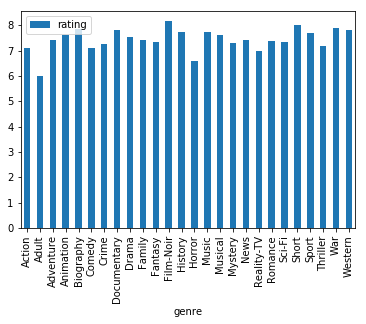

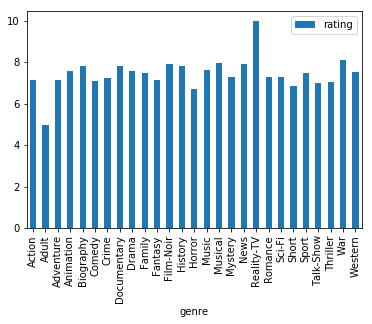

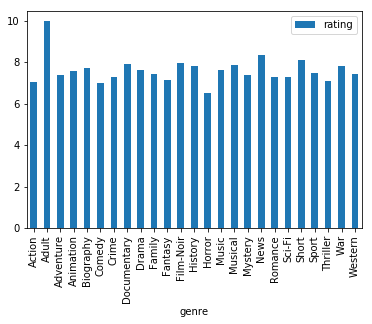

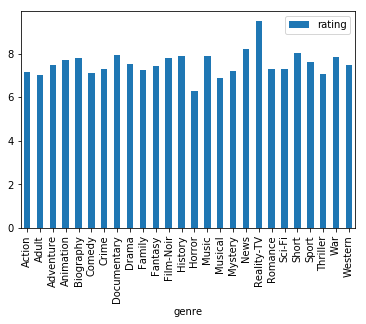

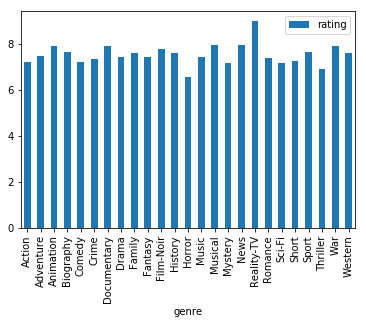

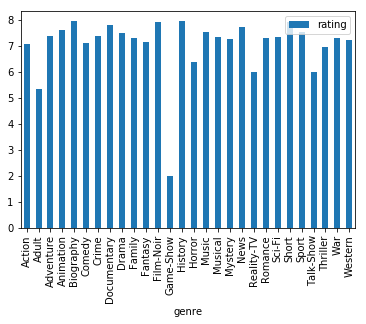

In [149]:
for i in df_ratings.year.unique():
    df_ratings.loc[df_ratings.year==i,["genre","rating"]].groupby(["genre"]).mean().plot(kind = "bar")

In [119]:
unique_genre = get_unique_genre(data_movies_tweets.genre.dropna().unique())

In [120]:
unique_genre

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [ ]:
[Exploratory data analysis](#eda)
* [Interesting Insight 1: Synergy of Genres](#ii1)
* [Interesting Insight 2: Best Actors in The Genre](#ii2)
* [Interesting Insight 3: Importance of The Title in Films](#ii3)

## Interesting Insight 1: Synergy of Genres <a name="ii1"></a>

In [245]:
synergy_genres = MovieTweetingsData.genre.value_counts()

In [249]:
synergy_genres = synergy_genres.index[synergy_genres>1000] #Crop genres with less than 1000 ratings

Best ratings for multiple genres

In [254]:
MovieTweetingsData[MovieTweetingsData.genre.isin(synergy_genres)][["genre","rating"]].groupby("genre").mean().sort_values(ascending=False,by="rating")[:10]

,rating
genre,
Biography|Drama|War,8.542636
Biography|Comedy|Crime,8.287452
Adventure|Drama|Sci-Fi,8.280525
Drama|Western,8.268584
Western,8.238777
Drama|Family,8.094129
Drama|Music,8.067254
Biography|Drama|Thriller,8.056333
Comedy|Drama|Musical,8.051585


## Interesting Insight 2: Best Actors in The Genre <a name="ii2"></a>

In [326]:
imdb_films.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1405
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.5,163
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.6,993
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short",6.4,98
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short,6.2,1697


In [325]:
imdb_actors.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0043044,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0037382,tt0038355,tt0071877,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0057345,tt0054452,tt0049189,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0077975,tt0078723,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0060827,tt0083922,tt0050976,tt0050986"


In [342]:
sum(imdb_actors["primaryProfession"].isna())

1548342

In [335]:
for i in imdb_films.loc[imdb_films["tconst"] == "tt0043044"]["genres"].str.split(","):
    print(i)

['Biography', 'Comedy', 'Musical']


In [17]:
from tqdm import tqdm

In [37]:
def get_actor_genre_rating(imdb_actors, imdb_films):
    names = []
    titles = []
    ratings = []
    genres = []
    num_votes = []
    for _, line in tqdm(imdb_actors.iterrows()):
        if ("actress" == line["primaryProfession"].split(",")[0]) or ("actor" == line["primaryProfession"].split(",")[0]):
            for title in line["knownForTitles"].split(","):
                try: #Some Films dont get rating
                    film = imdb_films.loc[title]
                    for genre in film["genres"].split(","):
                        names.append(line["primaryName"])
                        titles.append(film["primaryTitle"])
                        ratings.append(film["averageRating"])
                        num_votes.append(film["numVotes"])
                        genres.append(genre)
                        
                except KeyError:
                    pass # print("Index ", title, " is not in imdb dataset")
    return pd.DataFrame({"name":names, "title":titles, "rating":ratings, "num_votes":num_votes, "genre":genres})

In [20]:
imdb_df = get_actor_genre_rating(imdb_actors.fillna(value="NotAvalibe"), imdb_films.fillna(value="NotAvalibe").set_index('tconst'))

8818587it [50:07, 2932.67it/s]


In [ ]:
#Max Iteration ~ 9 000 000

In [33]:
imdb_df.shape
.head(2)

(6889002, 4)

In [35]:
# TODO: cutoff by num_votes, use weighted-average  make https://stackoverflow.com/questions/26205922/calculate-weighted-average-using-a-pandas-dataframe
imdb_df.loc[imdb_df.num_votes>1000, ["genre", "name", "rating"]].groupby(["genre","name"]).mean().reset_index().sort_values(by="rating", ascending=False).groupby(["genre","name"]).head(1)
# imdb_df.loc[imdb_df.num_votes>1000,["genre", "name", "rating"]].groupby(["genre","name"]).mean().sort_values(by="rating", ascending=False)

rating
genre     name                         
Music     Alpy Nics                10.0
Family    Ariel Rivers             10.0
Crime     Daisy Nefatari           10.0
Short     Victor Tapeanu           10.0
          Charles Belt             10.0
          Jynx Jenkins             10.0
Family    Michael Standifer        10.0
          Max Cups                 10.0
Drama     Nicole Carito            10.0
Short     Mitar Avramovic          10.0
          Leah Bruce               10.0
Fantasy   Fadila Bezzah            10.0
Short     Jedd Shepherd            10.0
          John Beacham             10.0
          Rex Cheng                10.0
          Ian Morel                10.0
Drama     Rudolf Wünzer            10.0
Short     Madison Crawford         10.0
Family    Krystina Stinson         10.0
Comedy    Charles Epting III       10.0
Short     Oscar Cabeo              10.0
          Dymon Scott              10.0
          Dyonne Diamond           10.0
          Allene Prince            10.0
Comedy    Carsten Steen Nielsen    10.0
Action    Vincent Donato           10.0
Music     Emily Geary              10.0
Short     Cafú                     10.0
Drama     Haley Fieldhouse         10.0
Comedy    Virginia Reno            10.0
...                                 ...
          Ryusuke Komakine          1.0
          Kechon                    1.0
          Teruhiko Nobukuni         1.0
Adventure Andrew Dow                1.0
Horror    Jun Nanjô                 1.0
Action    Hajime Umeda              1.0
Short     Lisa Le                   1.0
          Lana Gishkariany          1.0
Comedy    Valeriy Tagolev           1.0
          Jalen Johnson             1.0
          Jeremy Rucinski           1.0
Crime     Nerea Landa               1.0
Thriller  Rick Rae                  1.0
Romance   Gôta Ishida               1.0
Drama     Merle Johnson             1.0
          Satoru Tsujinashi         1.0
          Eliquence B. Young        1.0
Short     Dena Rysdam Miller        1.0
Romance   Tzu-hua Ho                1.0
Comedy    Kazuki Kawakami           1.0
Short     Zachary Allan             1.0
Thriller  Lacey Boogeyman           1.0
Sci-Fi    Ty Graham                 1.0
          Lana Gishkariany          1.0
Romance   Chris Lung                1.0
Drama     Hajime Umeda              1.0
Comedy    Valerie Matiz             1.0
          Ekaterina Bershtein       1.0
          Nanami Higuchi            1.0
Short     Jack Matzye               1.0

[5426564 rows x 1 columns]